In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
#get_ipython().run_line_magic('matplotlib', 'inline') Alternative command
from scipy import stats
import statsmodels.api as sm
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


### In this case we will use 1 feature ( categorical ) and check thier significance as per the target variable weather to use them ? or drop them in ML pipeline

In [5]:
print(df.info())
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB
None
customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int

# 1. 
### Weather Gender impacts on Churn ? or not ?

# Null : There is no relationship in B/W categorical variables
# Alternate : There is a relationship B/W both

In [6]:
table = pd.crosstab(df['gender'] , df['Churn'])
table

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [10]:
table.iloc[1]

Churn
No     2625
Yes     930
Name: Male, dtype: int64

In [11]:
Observed_Values = table.values 
print("Observed Values :\n",Observed_Values)

Observed Values :
 [[2549  939]
 [2625  930]]


In [16]:
import scipy.stats as stats
chi , p , ddof , val =stats.chi2_contingency(table)
print(chi)
print(p)
print(ddof)
print(val)
# We can say that p-value is > than 0.05 so our null hypothesis is true

0.4840828822091383
0.48657873605618596
1
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]]


In [17]:
# But les us check
Expected_Values = val
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
print(chi_square)
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

[0.13862033 0.38374617]


0.522366503358827

In [18]:
#p-value
alpha = 0.05
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)


p-value: 0.46983394114265187
Significance level:  0.05
Degree of Freedom:  1


In [19]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


# Paperless billing 

you can do it easily ( for paperless billing )

Text(0.5, 0.8, 'Ali')

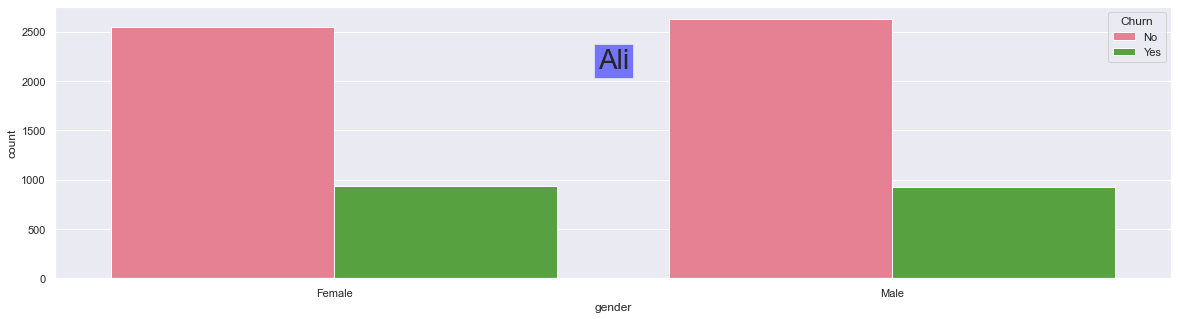

In [6]:
sns.set(style = 'darkgrid')
sns.set_palette('husl',3)
fig , ax = plt.subplots(figsize = (20,5))
ax = sns.countplot(x = 'gender' , hue='Churn' , data = df)

ax.text(0.5, 0.8, 'Ali', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes , 
        bbox=dict(facecolor='blue', alpha=0.5) , fontsize  = 28)

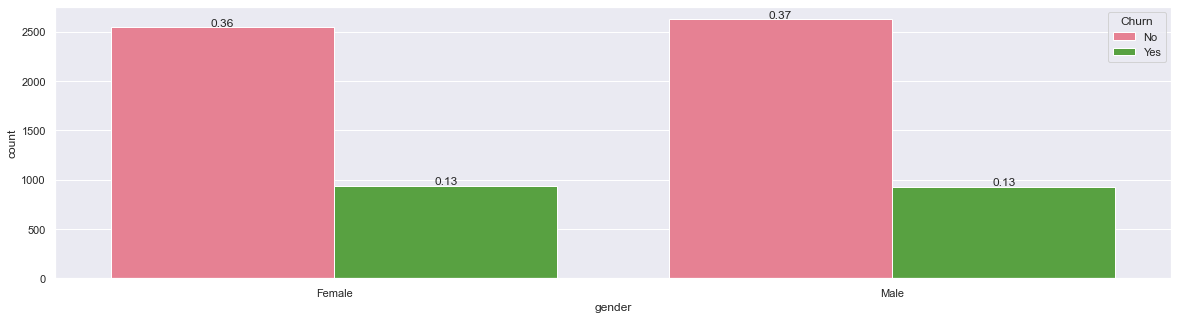

In [60]:
fig , ax1 = plt.subplots(figsize = (20,5))
ax1 = sns.countplot(x = 'gender' , hue='Churn' , data = df)

for p in ax.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2. , p.get_height()+10 ,
             '{:1.2f}'.format(height/df.shape[0]) , ha= 'center')
# Sammu try to understand this otherwise Ill be explaiing you in zoom session.

In [38]:
for p in ax.patches:
    print(p)
    print(p.get_height())
    print(p.get_width())
    print(p.get_x())
    print(p.get_y())
print(df.shape[0])  

Rectangle(xy=(-0.4, 0), width=0.4, height=2549, angle=0)
2549
0.4
-0.4
0
Rectangle(xy=(0.6, 0), width=0.4, height=2625, angle=0)
2625
0.4
0.6000000000000001
0
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=939, angle=0)
939
0.4000000000000001
-2.7755575615628914e-17
0
Rectangle(xy=(1, 0), width=0.4, height=930, angle=0)
930
0.4000000000000001
0.9999999999999999
0
7043


In [43]:
help(ax.text) 
# add text to the axes
# required positional arguments: 'x', 'y', and 's'

Help on method text in module matplotlib.axes._axes:

text(x, y, s, fontdict=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Add text to the axes.
    
    Add the text *s* to the axes at location *x*, *y* in data coordinates.
    
    Parameters
    ----------
    x, y : float
        The position to place the text. By default, this is in data
        coordinates. The coordinate system can be changed using the
        *transform* parameter.
    
    s : str
        The text.
    
    fontdict : dict, default: None
        A dictionary to override the default text properties. If fontdict
        is None, the defaults are determined by `.rcParams`.
    
    Returns
    -------
    `.Text`
        The created `.Text` instance.
    
    Other Parameters
    ----------------
    **kwargs : `~matplotlib.text.Text` properties.
        Other miscellaneous text parameters.
    
        Properties:
        agg_filter: a filter function, which takes a (m, n, 3) float

In [41]:
print(p.get_x() + p.get_width()/2. , p.get_height()+3)

1.2 933


In [62]:
3500/df.shape[0]

0.49694732358370014